📝 Data Wrangling Part 1 – Initial Cleaning

🔹 Objective

In this notebook, the goal is to:

Load raw IMDb datasets.

Understand their structure.

Perform first-stage cleaning (renaming, dropping unnecessary columns, handling missing values).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Title.basics data 

In [8]:
basics = pd.read_csv('../data/title.basics.tsv',sep='\t',low_memory=False,encoding='utf-8')

In [9]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11819904,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
11819905,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
11819906,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama
11819907,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [10]:
df1=basics[basics['titleType']=='movie']
df1

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
11819803,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
11819827,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
11819839,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
11819849,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


In [11]:
df1 = df1[['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres']]
df1.rename(columns={'tconst':"movieID",'primaryTitle':"title", 'startYear':"year", 'runtimeMinutes':"runtime", 'genres':"genre"}, inplace=True)
df1

C:\Users\vedan\AppData\Local\Temp\ipykernel_16716\818452082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'tconst':"movieID",'primaryTitle':"title", 'startYear':"year", 'runtimeMinutes':"runtime", 'genres':"genre"}, inplace=True)


,movieID,title,year,runtime,genre
8,tt0000009,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
498,tt0000502,Bohemios,1905,100,\N
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,1907,90,Drama
...,...,...,...,...,...
11819803,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
11819827,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
11819839,tt9916706,Dankyavar Danka,2013,\N,Comedy
11819849,tt9916730,6 Gunn,2017,116,Drama


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722133 entries, 8 to 11819859
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   movieID  722133 non-null  object
 1   title    722131 non-null  object
 2   year     722133 non-null  object
 3   runtime  722133 non-null  object
 4   genre    722133 non-null  object
dtypes: object(5)
memory usage: 33.1+ MB


In [13]:
df1.isnull().sum()

movieID    0
title      2
year       0
runtime    0
genre      0
dtype: int64

In [14]:
df1.dropna(subset=['title'], inplace=True)
df1

C:\Users\vedan\AppData\Local\Temp\ipykernel_16716\3461744115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['title'], inplace=True)


,movieID,title,year,runtime,genre
8,tt0000009,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
498,tt0000502,Bohemios,1905,100,\N
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,1907,90,Drama
...,...,...,...,...,...
11819803,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
11819827,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
11819839,tt9916706,Dankyavar Danka,2013,\N,Comedy
11819849,tt9916730,6 Gunn,2017,116,Drama


🧹 Step 2: Initial Cleaning

Column renaming: make names consistent (e.g., tconst → movieID, primaryTitle → title).

Data types: convert startYear and runtimeMinutes to numeric.

Missing values: check and handle where appropriate (drop or impute).

Duplicates: ensure movieID is unique in title-level data.

In [15]:
df1['runtime'] = pd.to_numeric(df1['runtime'], errors='coerce').astype('Int64')  
df1['year'] = pd.to_numeric(df1['year'], errors='coerce').astype('Int64')  

C:\Users\vedan\AppData\Local\Temp\ipykernel_16716\3775845684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['runtime'] = pd.to_numeric(df1['runtime'], errors='coerce').astype('Int64')
C:\Users\vedan\AppData\Local\Temp\ipykernel_16716\3775845684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = pd.to_numeric(df1['year'], errors='coerce').astype('Int64')


In [16]:
df1.isnull().sum()

movieID         0
title           0
year       106658
runtime    266222
genre           0
dtype: int64

In [17]:
df1.dropna(subset=['runtime','year'], inplace=True)
df1

C:\Users\vedan\AppData\Local\Temp\ipykernel_16716\2123111522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['runtime','year'], inplace=True)


,movieID,title,year,runtime,genre
8,tt0000009,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
498,tt0000502,Bohemios,1905,100,\N
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,1907,90,Drama
...,...,...,...,...,...
11819762,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama
11819803,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
11819827,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
11819849,tt9916730,6 Gunn,2017,116,Drama


In [18]:
df1.reset_index(drop=True, inplace=True)
df1

,movieID,title,year,runtime,genre
0,tt0000009,Miss Jerry,1894,45,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
2,tt0000502,Bohemios,1905,100,\N
3,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
4,tt0000591,The Prodigal Son,1907,90,Drama
...,...,...,...,...,...
448052,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama
448053,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
448054,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
448055,tt9916730,6 Gunn,2017,116,Drama


In [ ]:
df1.to_csv('../temp/movie_basics.csv', index=False)

Ratings data

In [3]:
rating=pd.read_csv('../data/title.ratings.tsv',sep='\t',low_memory=False,encoding='utf-8')


In [4]:
df2=rating
df2

,tconst,averageRating,numVotes
0,tt0000001,5.7,2168
1,tt0000002,5.5,298
2,tt0000003,6.5,2228
3,tt0000004,5.3,191
4,tt0000005,6.2,2967
...,...,...,...
1598625,tt9916846,5.8,6
1598626,tt9916848,5.8,6
1598627,tt9916850,5.8,6
1598628,tt9916852,5.8,6


In [5]:
df2.rename(columns={'tconst':"movieID",'averageRating':"rating", 'numVotes':"votes"}, inplace=True)
df2

,movieID,rating,votes
0,tt0000001,5.7,2168
1,tt0000002,5.5,298
2,tt0000003,6.5,2228
3,tt0000004,5.3,191
4,tt0000005,6.2,2967
...,...,...,...
1598625,tt9916846,5.8,6
1598626,tt9916848,5.8,6
1598627,tt9916850,5.8,6
1598628,tt9916852,5.8,6


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598630 entries, 0 to 1598629
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   movieID  1598630 non-null  object 
 1   rating   1598630 non-null  float64
 2   votes    1598630 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.6+ MB


In [19]:
df2.isnull().sum()

movieID    0
rating     0
votes      0
dtype: int64

In [20]:
df2.to_csv('../temp/movie_ratings.csv', index=False)

🔗 Step 3: Merge Titles with Ratings

Join title.basics with title.ratings on movieID to create the first version of our main dataset.

In [20]:
maindf1=df1.merge(df2, on='movieID', how='left')
maindf1

,movieID,title,year,runtime,genre,rating,votes
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,228.0
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.2,564.0
2,tt0000502,Bohemios,1905,100,\N,3.6,22.0
3,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0
4,tt0000591,The Prodigal Son,1907,90,Drama,5.3,34.0
...,...,...,...,...,...,...,...
448052,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0
448053,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary,NaN,NaN
448054,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary,NaN,NaN
448055,tt9916730,6 Gunn,2017,116,Drama,7.0,13.0


In [22]:
maindf1.to_csv('../temp/maindf1.csv', index=False)

In [21]:
maindf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448057 entries, 0 to 448056
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieID  448057 non-null  object 
 1   title    448057 non-null  object 
 2   year     448057 non-null  Int64  
 3   runtime  448057 non-null  Int64  
 4   genre    448057 non-null  object 
 5   rating   300011 non-null  float64
 6   votes    300011 non-null  float64
dtypes: Int64(2), float64(2), object(3)
memory usage: 24.8+ MB


In [22]:
maindf1.isnull().sum()

movieID         0
title           0
year            0
runtime         0
genre           0
rating     148046
votes      148046
dtype: int64

In [23]:
maindf1.dropna(subset=['rating','votes'], inplace=True)
maindf1

,movieID,title,year,runtime,genre,rating,votes
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,228.0
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.2,564.0
2,tt0000502,Bohemios,1905,100,\N,3.6,22.0
3,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0
4,tt0000591,The Prodigal Son,1907,90,Drama,5.3,34.0
...,...,...,...,...,...,...,...
448049,tt9916190,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,264.0
448050,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0
448051,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0
448052,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0


In [24]:
maindf1['genre'] = maindf1['genre'].replace('\\N', np.nan)
maindf1['genre'].isnull().sum()

np.int64(6408)

In [25]:
maindf1.dropna(subset=['genre'], inplace=True)

In [26]:
etc=maindf1.copy()
etc['genre'] =etc['genre'].str.split(',')
etc= etc.explode('genre')
etc['genre'].unique()

array(['Romance', 'Documentary', 'News', 'Sport', 'Action', 'Adventure',
       'Biography', 'Drama', 'Fantasy', 'Family', 'War', 'History',
       'Thriller', 'Crime', 'Western', 'Comedy', 'Mystery', 'Horror',
       'Music', 'Sci-Fi', 'Musical', 'Animation', 'Film-Noir', 'Adult',
       'Reality-TV', 'Talk-Show', 'Game-Show'], dtype=object)

In [27]:
etc['genre'].value_counts()

genre
Drama          140256
Comedy          74565
Documentary     49619
Romance         33567
Action          30499
Crime           27253
Thriller        25923
Horror          23512
Adventure       18690
Mystery         12549
Family          11725
Biography       10003
Fantasy          9415
History          8879
Music            7958
Sci-Fi           7384
Musical          6344
War              6317
Animation        5560
Western          4994
Sport            3934
Adult            3861
Film-Noir         881
News              669
Reality-TV         61
Talk-Show          20
Game-Show           5
Name: count, dtype: int64

In [28]:
maindf1['rating'].value_counts().sort_index()


rating
1.0      33
1.1      30
1.2      35
1.3      59
1.4      61
       ... 
9.6     225
9.7     132
9.8      86
9.9       6
10.0     16
Name: count, Length: 91, dtype: int64

Graphs and insights

In [27]:
sns.set(rc={'figure.figsize':(12,8)})

Count of movies per year increased exponentially with some major hike in movies per year

<Axes: xlabel='year', ylabel='Count'>

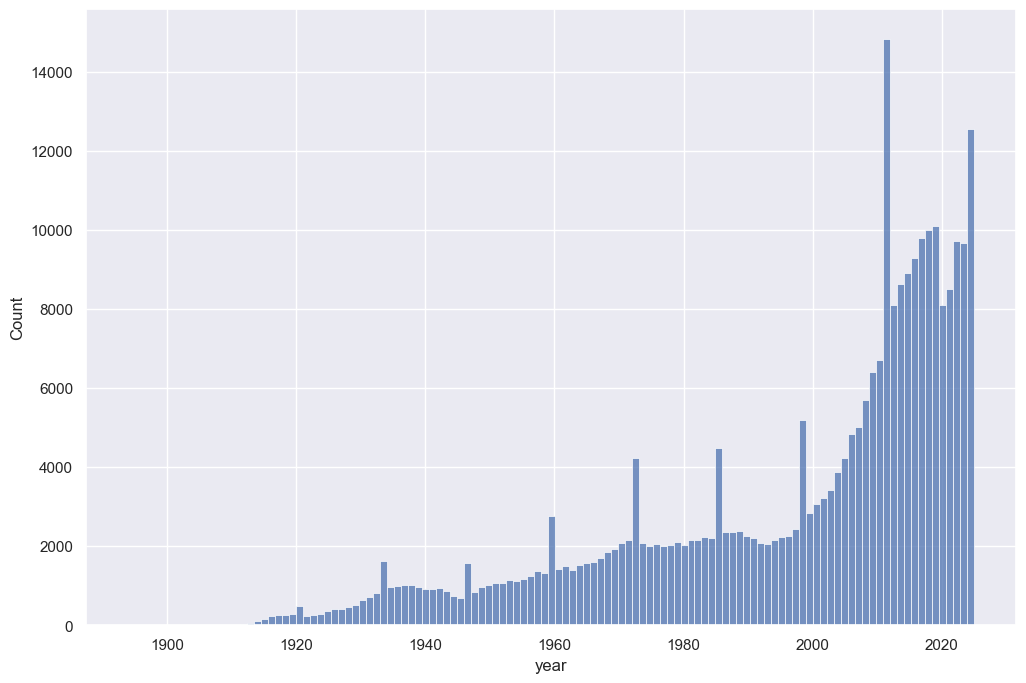

In [28]:
sns.histplot(x='year',data=maindf1)


<Axes: xlabel='rating', ylabel='count'>

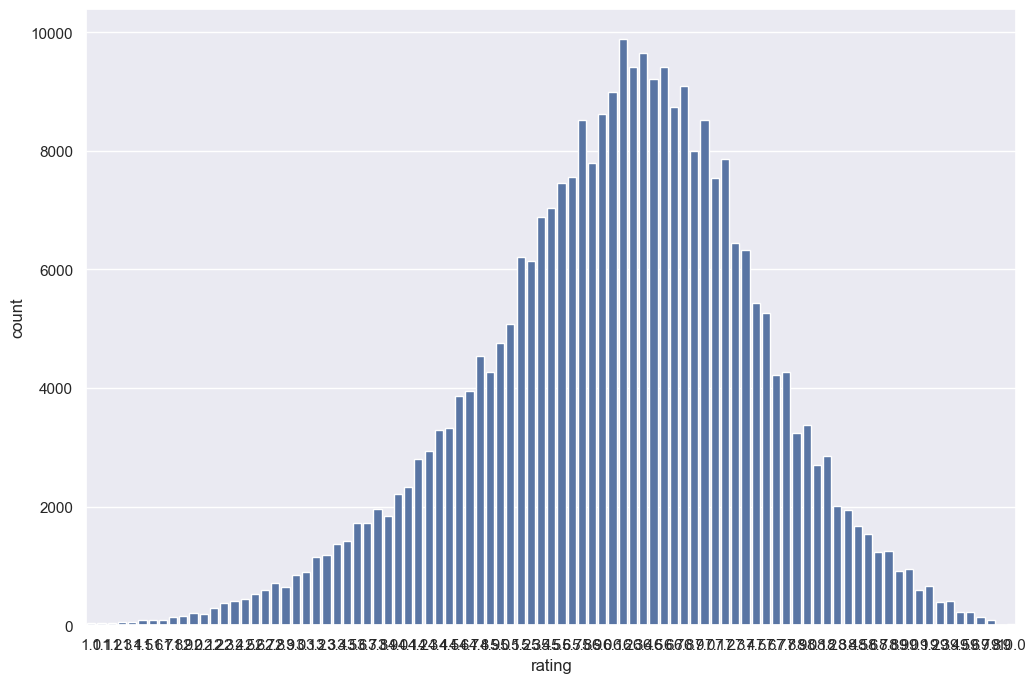

In [29]:
sns.countplot(x='rating',data=maindf1)


<Axes: xlabel='genre'>

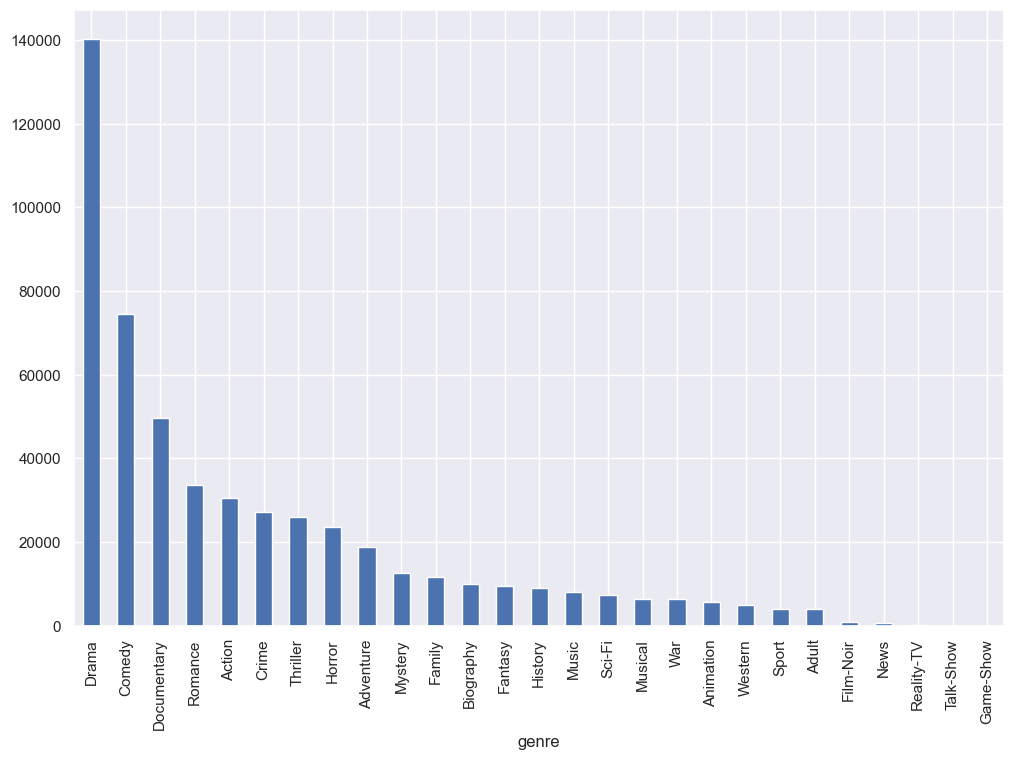

In [30]:
etc['genre'].value_counts().plot(kind='bar')

Top 20 Genres by rating

<Axes: title={'center': 'Top 20 Directors by Average Rating'}, xlabel='genre'>

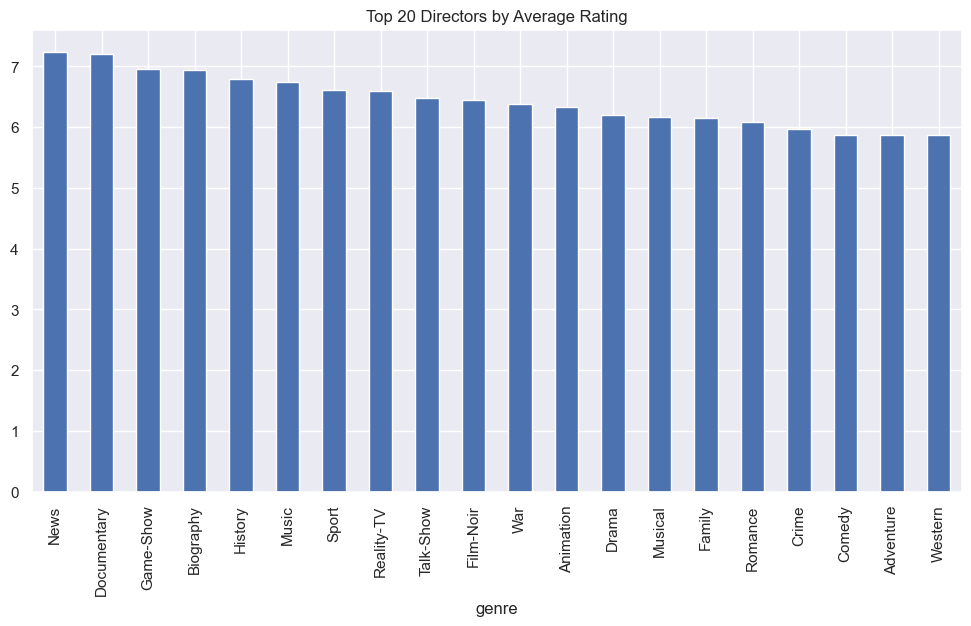

In [31]:
avg_rating_per_genre = etc.groupby('genre')['rating'].mean()
top_genre = avg_rating_per_genre.sort_values(ascending=False).head(20)
top_genre.plot(kind='bar', figsize=(12, 6), title='Top 20 Directors by Average Rating')

<Axes: xlabel='genre', ylabel='rating'>

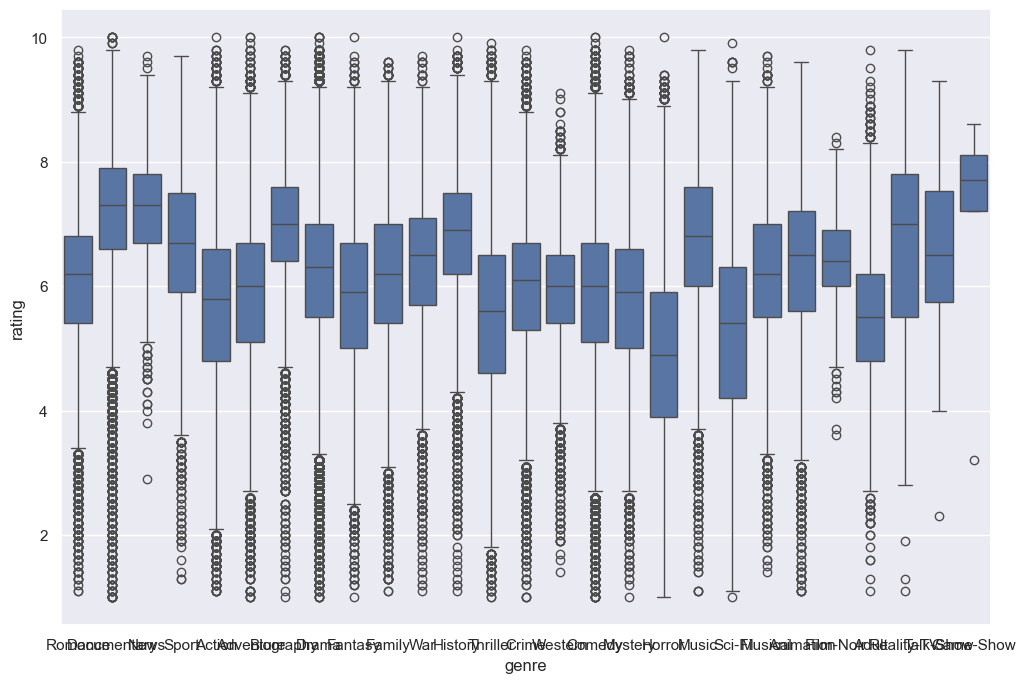

In [32]:
sns.boxplot(data=etc, x='genre', y='rating')

<Axes: xlabel='runtime', ylabel='rating'>

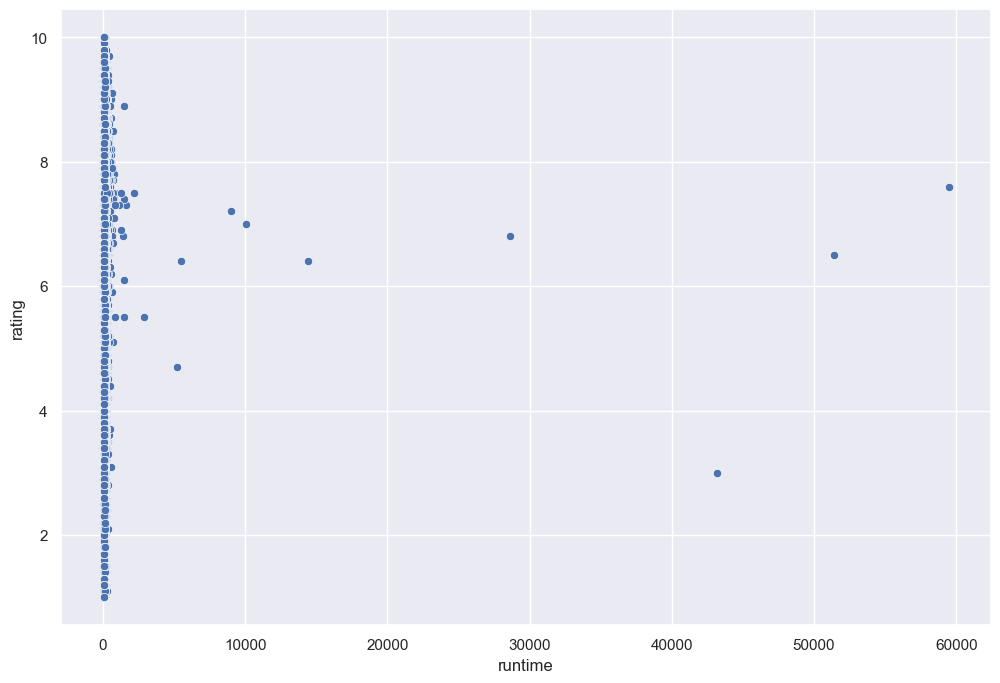

In [33]:
sns.scatterplot(x='runtime', y='rating',data=maindf1)

<Axes: xlabel='year'>

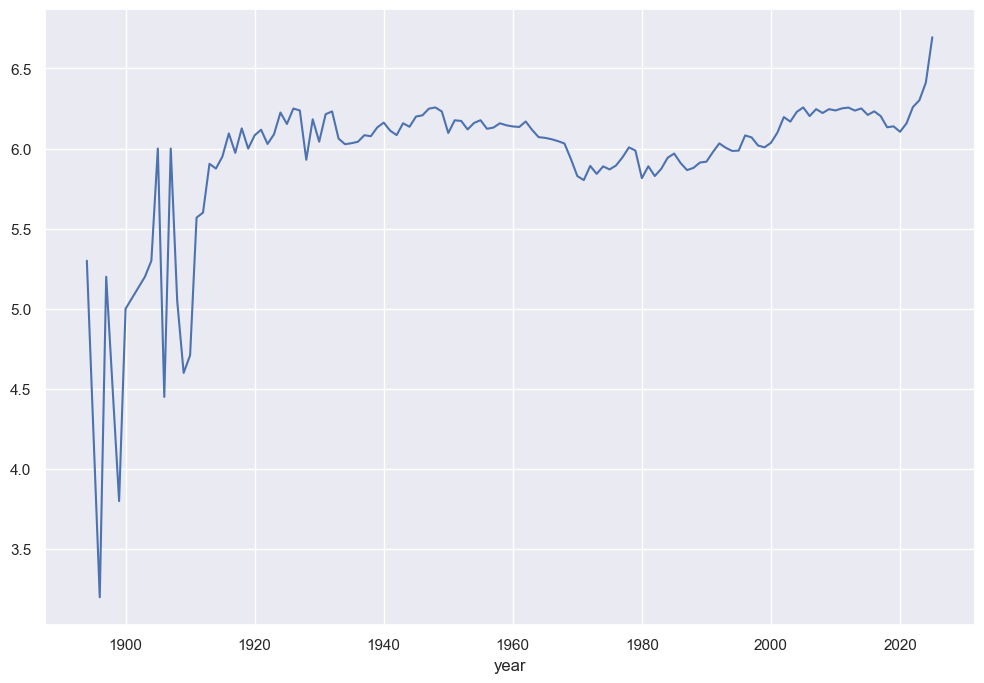

In [34]:
yearly = maindf1.groupby('year')['rating'].mean()
yearly.plot()

<Axes: xlabel='votes', ylabel='rating'>

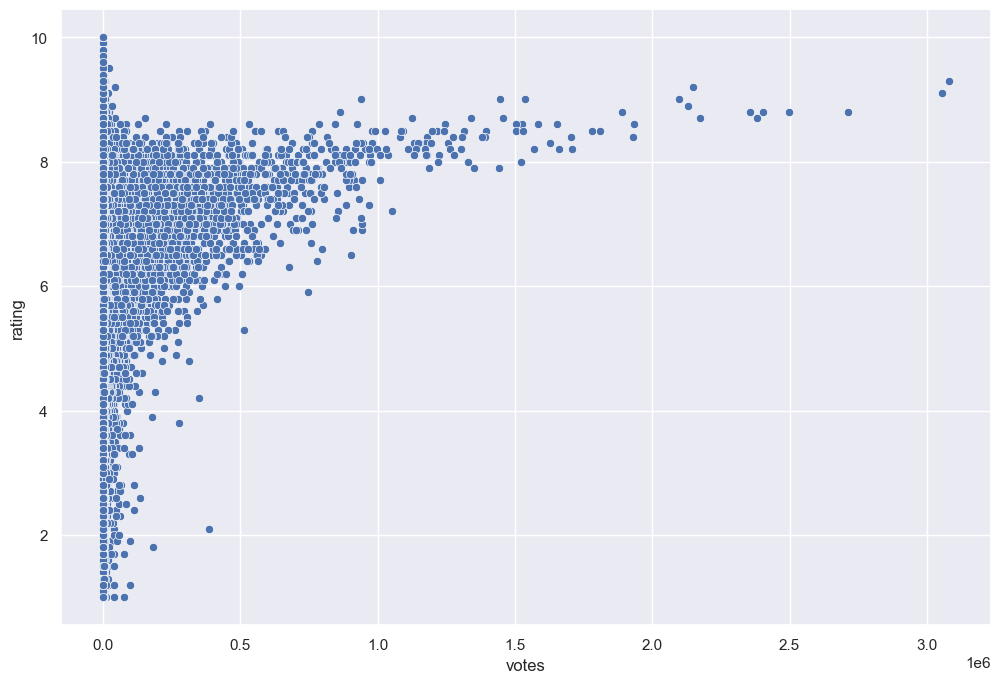

In [35]:
sns.scatterplot(x='votes', y='rating', data=maindf1)

Observation: The "Funnel of Quality"

The scatter plot reveals a distinct funnel shape, which tells a powerful story:

1.  **Low Vote Chaos**: On the far left (low votes), ratings are all over the place. You can find movies with ratings from 1 to 10. This is the "noise" we want to filter out, as these ratings aren't based on a broad consensus.
2.  **High Vote Consensus**: As you move to the right (more votes), the ratings become much less volatile. The funnel narrows significantly, and it's extremely rare to see a highly-voted movie with a rating below 5.0.

**Conclusion**: This plot visually confirms our strategy. To perform a meaningful analysis, we **must** filter out the low-vote movies on the left and focus on the films within the "funnel of quality" where ratings are more stable and representative.

✅ Outcome of Part 1
We have successfully created `maindf1`, a clean and robust DataFrame containing essential information for over films. This dataset has:

A clean movie-level DataFrame containing title, year, runtime, genre, rating, and votes.

-   One row per movie.
-   Correct data types for numerical analysis.
-   Been filtered to include only relevant, sufficiently popular movies.
-   This DataFrame is now the solid foundation for all subsequent analysis.

Saved dataset for the next stage → merging with crew and name-level information.